# SHAP

- https://blog.dominodatalab.com/shap-lime-python-libraries-part-1-great-explainers-pros-cons/
- https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d
- https://christophm.github.io/interpretable-ml-book/shapley.html
- https://christophm.github.io/interpretable-ml-book/shap.html#definition

In [2]:
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.simplefilter('ignore')

%matplotlib inline

shap.initjs()


/Users/spencer/venv/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from sklearn.datasets import load_wine
raw = load_wine()

print(raw['DESCR'])

wine = pd.DataFrame(raw['data'], columns=raw['feature_names'])
wine['target'] = raw['target']
wine.info()

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [5]:
wine.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
X = wine.drop(columns=['target'])
clf.fit(X, wine['target'])
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
X.shape

(178, 13)

In [20]:
from shap import TreeExplainer

explainer = TreeExplainer(clf, data=X)
shap_vals = explainer.shap_values(X)
shap_vals = shap_vals[0]
shap_vals.shape

(178, 13)

In [26]:
print(X.iloc[0, :])
print(shap_vals[0, :])
print(shap_vals[0, :].sum())
print(explainer.expected_value[0])
print(wine.loc[0, 'target'])

alcohol                           14.23
malic_acid                         1.71
ash                                2.43
alcalinity_of_ash                 15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
od280/od315_of_diluted_wines       3.92
proline                         1065.00
Name: 0, dtype: float64
[ 0.05684457  0.01770599 -0.00336142  0.02139513  0.01145131  0.09367978
  0.06308053  0.0147191   0.01448502  0.08479401  0.01876405  0.07656367
  0.20684457]
0.6769663069601265
0.32303371267874587
0


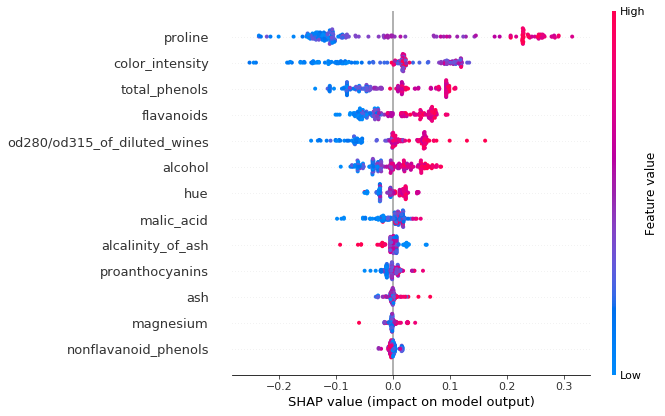

In [27]:
shap.summary_plot(shap_vals, X)

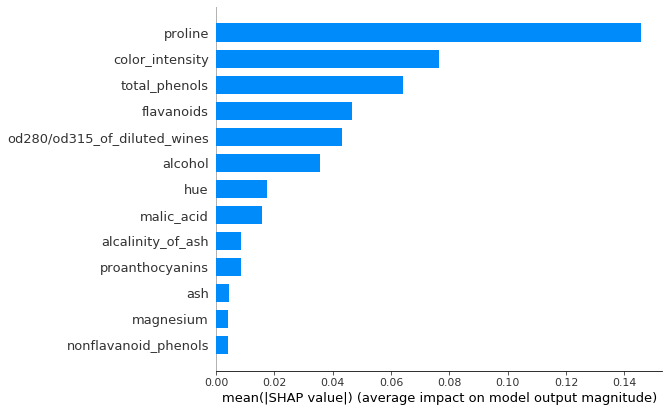

In [28]:
shap.summary_plot(
    shap_values=shap_vals,
    features=X,
    feature_names=X.columns,
    plot_type='bar',
)

In [36]:
df = pd.DataFrame(shap_vals, columns=X.columns)
df['target'] = wine['target']
df.groupby('target').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
target,,,,,,,,,,,,,
0,0.046639,0.011089,0.002612,0.009544,0.005439,0.087780,0.063453,0.004955,0.009287,0.099366,0.016278,0.059123,0.213942
1,-0.038623,-0.011930,-0.002658,-0.005063,-0.003774,-0.021089,-0.013550,-0.001849,-0.002973,-0.093854,0.004358,-0.002209,-0.117144
2,-0.000285,0.004398,0.000439,-0.004242,-0.001103,-0.076702,-0.057951,-0.003356,-0.008748,0.016356,-0.024868,-0.069404,-0.089234


In [39]:
explainer.expected_value[0]

0.32303371267874587

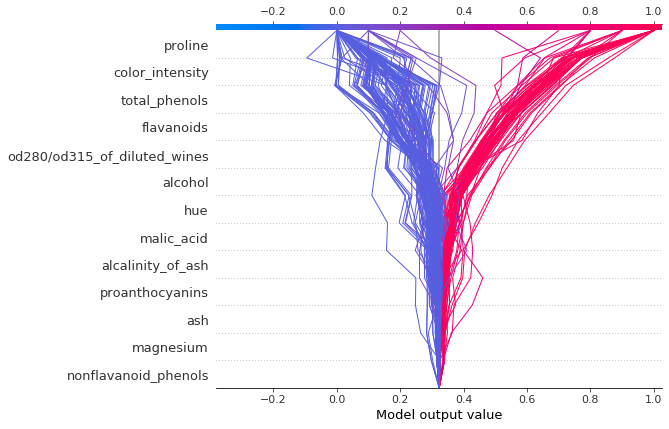

In [38]:
shap.decision_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_vals,
    features=X,
    feature_names=X.columns.tolist(),
#     feature_display_range=slice(-1, -6, -1),
#     link='logit',
)

In [42]:
shap.force_plot(
    base_value=explainer.expected_value[0],
    shap_values=shap_vals,
    features=X,
    feature_names=X.columns,
#     link='logit',
)

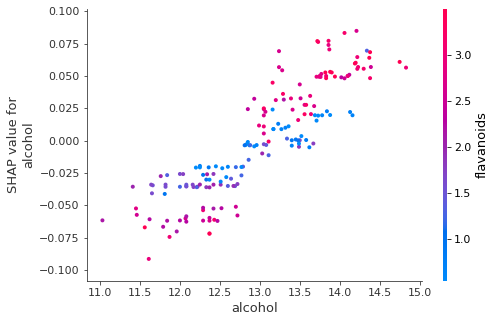

In [44]:
shap.dependence_plot(
    ind='alcohol',
    shap_values=shap_vals,
    features=X,
    feature_names=X.columns,
)

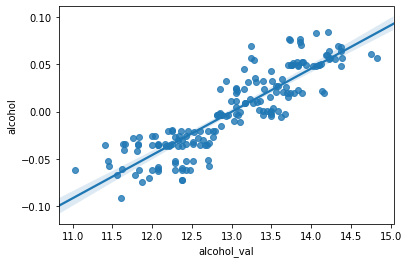

In [49]:
import seaborn as sns

df = pd.DataFrame(shap_vals, columns=X.columns)
df['alcohol_val'] = X['alcohol']

sns.regplot('alcohol_val', 'alcohol', data=df)

## Logistic Regression First

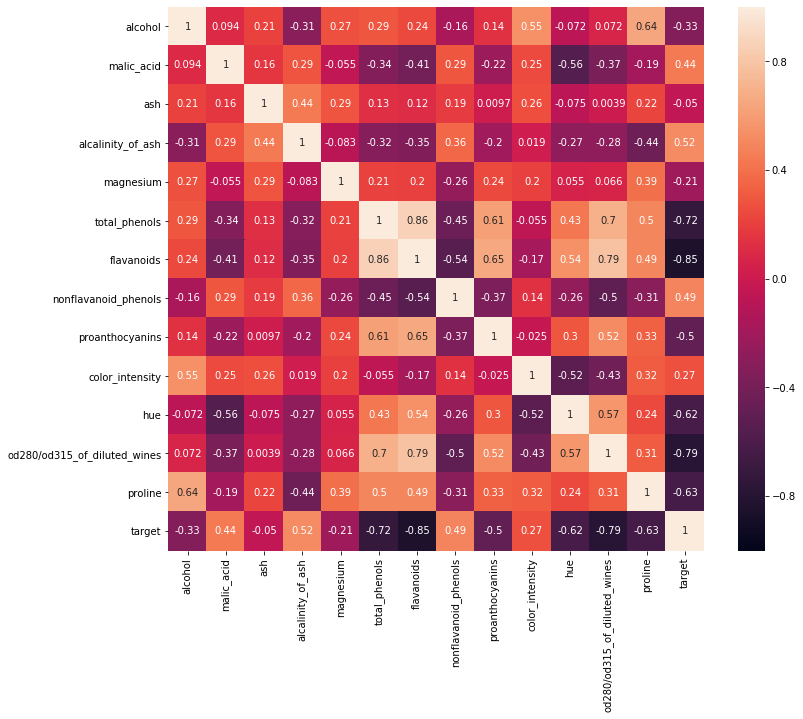

In [3]:
_, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(wine.corr(), annot=True, vmax=1, vmin=-1, ax=ax)

Text(0.5, 1.0, 'PCA Ex. Var')

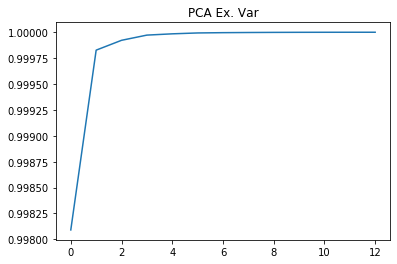

In [4]:
from sklearn.decomposition import PCA

pca = PCA().fit(wine.drop(columns=['target']))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA Ex. Var')

In [5]:
logit = sm.MNLogit(endog=wine['target'], exog=sm.add_constant(wine.drop(columns=['target'])))
model = logit.fit(method='lbfgs', disp=True)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 target   No. Observations:                  178
Model:                        MNLogit   Df Residuals:                      150
Method:                           MLE   Df Model:                           26
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.8561
Time:                        09:23:50   Log-Likelihood:                -27.815
converged:                      False   LL-Null:                       -193.31
                                        LLR p-value:                 1.264e-54
================================================================================================
                    target=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0379     15.699      0.002      0.998     -30.731      30.807
alcohol                          0.1563      1.197      0.131      0.896      -2.190       2.502
malic_acid                      -0.3664      0.679     -0.539      0.590      -1.698       0.965
ash                              0.0068      2.470      0.003      0.998      -4.835       4.848
alcalinity_of_ash                0.5466      0.294      1.862      0.063      -0.029       1.122
magnesium                        0.0506      0.048      1.047      0.295      -0.044       0.145
total_phenols                    0.2083      1.554      0.134      0.893      -2.837       3.254
flavanoids                       0.3532      1.751      0.202      0.840      -3.078       3.785
nonflavanoid_phenols            -0.0005      6.197  -8.86e-05      1.000     -12.146      12.145
proanthocyanins                  0.1676      1.558      0.108      0.914      -2.885       3.221
color_intensity                 -1.1087      0.710     -1.561      0.118      -2.500       0.283
hue                              0.1440      4.765      0.030      0.976      -9.196       9.483
od280/od315_of_diluted_wines     0.3740      1.589      0.235      0.814      -2.740       3.489
proline                         -0.0194      0.006     -3.367      0.001      -0.031      -0.008
------------------------------------------------------------------------------------------------
                    target=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0078     20.713     -0.000      1.000     -40.605      40.590
alcohol                          0.0967      1.502      0.064      0.949      -2.847       3.040
malic_acid                       0.4497      0.841      0.535      0.593      -1.199       2.099
ash                              0.0326      3.678      0.009      0.993      -7.177       7.242
alcalinity_of_ash                0.5247      0.396      1.324      0.186      -0.252       1.302
magnesium                       -0.0694      0.092     -0.758      0.449      -0.249       0.110
total_phenols                   -0.2644      2.330     -0.114      0.910      -4.830       4.301
flavanoids                      -0.5291      2.193     -0.241      0.809      -4.827       3.769
nonflavanoid_phenols             0.0284      8.069      0.004      0.997     -15.786      15.843
proanthocyanins                 -0.2032      2.192     -0.093      0.926      -4.499       4.093
color_intensity                  1.2896      0.699      1.844      0.065      -0.081       2.660
hue                             -0.1377      6.148     -0.022      0.982     -12.188      11.913
od280/od315_of_diluted_wines    -0.4464      1.913     -0.233      0.816      -4.196       3.303
proline                         -0.0120 

## Logit with Normalized Features (For Feature Importance)

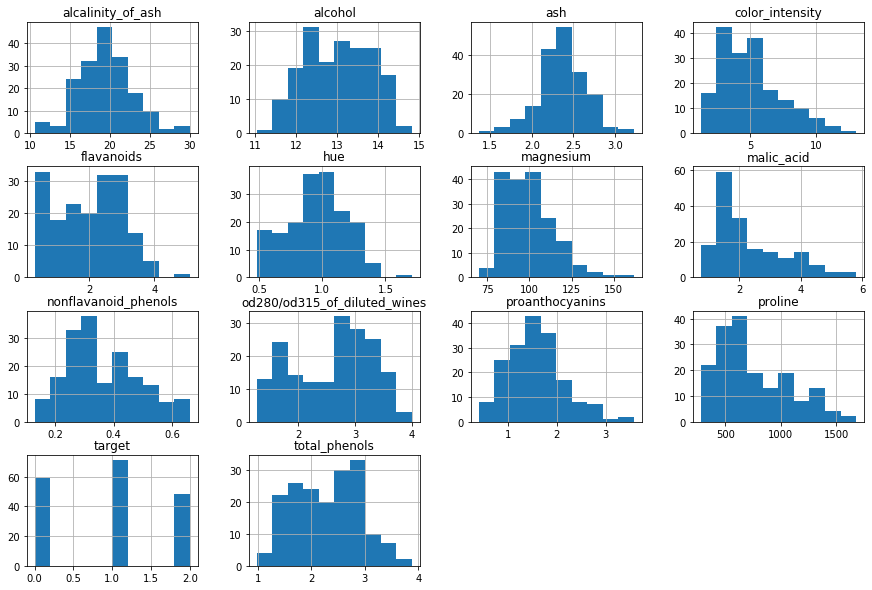

In [6]:
_, ax = plt.subplots(figsize=(15, 10))
wine.hist(ax=ax);

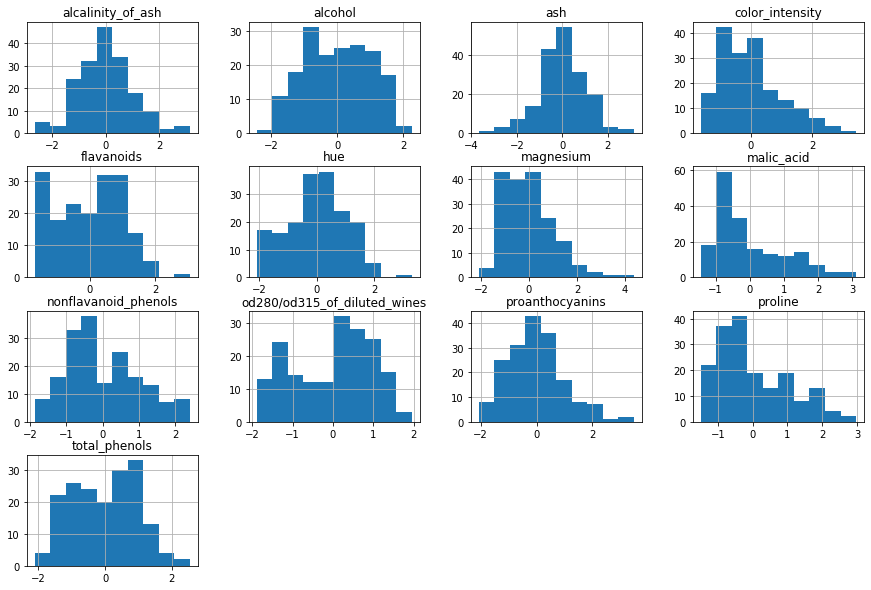

In [7]:
from sklearn.preprocessing import StandardScaler

wine_norm = StandardScaler().fit_transform(wine.drop(columns=['target']))
wine_norm = pd.DataFrame(wine_norm, columns=wine.drop(columns=['target']).columns)

_, ax = plt.subplots(figsize=(15, 10))
wine_norm.hist(ax=ax);

In [8]:
# Normalize data for feature importance

logit2 = sm.MNLogit(endog=wine['target'], exog=sm.add_constant(wine_norm))
model2 = logit2.fit(method='lbfgs', disp=True)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 target   No. Observations:                  178
Model:                        MNLogit   Df Residuals:                      150
Method:                           MLE   Df Model:                           26
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                   1.000
Time:                        09:23:54   Log-Likelihood:             -0.0039082
converged:                       True   LL-Null:                       -193.31
                                        LLR p-value:                 6.738e-66
================================================================================================
                    target=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -1.7547    310.775     -0.006      0.995    -610.863     607.354
alcohol                         -7.6492    229.152     -0.033      0.973    -456.779     441.481
malic_acid                      -3.8071    173.281     -0.022      0.982    -343.432     335.818
ash                             -7.4790    119.705     -0.062      0.950    -242.096     227.138
alcalinity_of_ash                7.4579    329.325      0.023      0.982    -638.008     652.924
magnesium                        0.4238    232.929      0.002      0.999    -456.108     456.955
total_phenols                   -0.5139    205.305     -0.003      0.998    -402.905     401.877
flavanoids                      -0.2205    227.284     -0.001      0.999    -445.689     445.248
nonflavanoid_phenols             3.2221    182.654      0.018      0.986    -354.772     361.216
proanthocyanins                  0.4150    176.218      0.002      0.998    -344.965     345.795
color_intensity                 -7.0031    222.381     -0.031      0.975    -442.863     428.856
hue                              3.3666    343.217      0.010      0.992    -669.325     676.059
od280/od315_of_diluted_wines    -3.6361    295.520     -0.012      0.990    -582.844     575.572
proline                        -11.9248    361.995     -0.033      0.974    -721.422     697.572
------------------------------------------------------------------------------------------------
                    target=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -4.2530    772.190     -0.006      0.996   -1517.717    1509.211
alcohol                         -1.7643    535.484     -0.003      0.997   -1051.294    1047.765
malic_acid                      -0.8940    294.449     -0.003      0.998    -578.003     576.215
ash                              1.6022    850.988      0.002      0.998   -1666.303    1669.508
alcalinity_of_ash                3.2040    415.982      0.008      0.994    -812.105     818.513
magnesium                       -1.4006    627.840     -0.002      0.998   -1231.945    1229.144
total_phenols                   -0.8576    522.866     -0.002      0.999   -1025.656    1023.941
flavanoids                      -8.3753    372.025     -0.023      0.982    -737.532     720.781
nonflavanoid_phenols            -0.7474    300.143     -0.002      0.998    -589.017     587.522
proanthocyanins                 -1.8826    362.879     -0.005      0.996    -713.112     709.346
color_intensity                  6.6289    721.821      0.009      0.993   -1408.115    1421.372
hue                             -5.7134   1086.442     -0.005      0.996   -2135.100    2123.673
od280/od315_of_diluted_wines    -6.0045    514.920     -0.012      0.991   -1015.230    1003.221
proline                         -1.7010 

Text(0.5, 1.0, 'Importance target=2')

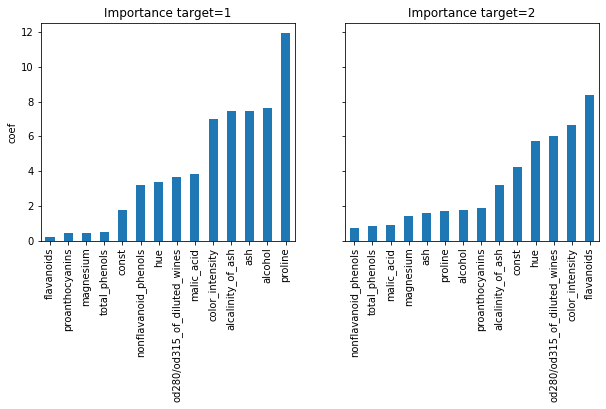

In [9]:
_, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

model2.params[0].abs().sort_values().plot.bar(ax=ax[0])
ax[0].set_ylabel('coef')
ax[0].set_title('Importance target=1')

model2.params[1].abs().sort_values().plot.bar(ax=ax[1])
ax[1].set_title('Importance target=2')

## SHAP Explaination

In [10]:
from shap.explainers.linear import LinearExplainer

# Explain only the first: target=1
coef = model2.params[0][1:].values.reshape(-1)
intercept = model2.params[0][0]
logit_explainer = LinearExplainer(
    model=(coef, intercept),
    data=wine_norm.values,
    feature_dependence='correlation', # didn't take time to drop features
)

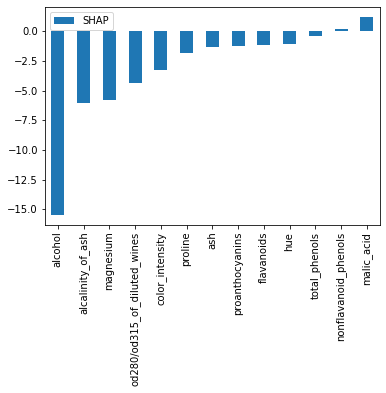

In [11]:
shap_vals = logit_explainer.shap_values(wine_norm.head(1))
df = pd.DataFrame(shap_vals.T, index=wine_norm.columns, columns=['SHAP'])
df = df.sort_values('SHAP')
df.plot.bar()

In [12]:
shap_vals = logit_explainer.shap_values(wine_norm.head(1))
print(wine.loc[0, 'target'] == 1)
shap.force_plot(
    base_value=logit_explainer.expected_value,
    shap_values=shap_vals,
    features=wine_norm.head(1),
    feature_names=wine_norm.columns,
    link='logit'
)

False


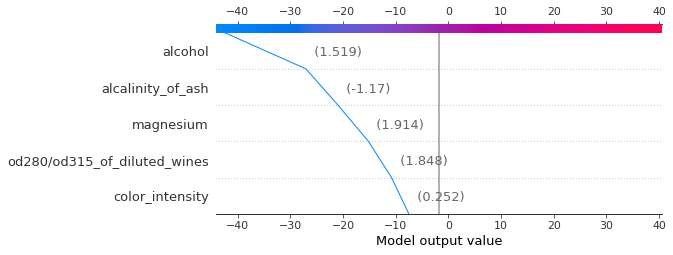

In [13]:
X = wine_norm.loc[0, :].values.reshape(1, -1)
shap_vals = logit_explainer.shap_values(X)
shap.decision_plot(
    base_value=logit_explainer.expected_value,
    shap_values=shap_vals,
    features=X,
    feature_names=wine_norm.columns.tolist(),
    feature_display_range=slice(-1, -6, -1),
#     link='logit',
)

In [14]:
X = wine_norm.loc[60, :].values.reshape(1, -1)
shap_vals = logit_explainer.shap_values(X)
print(wine.loc[60, 'target'] == 1)
shap.force_plot(
    base_value=logit_explainer.expected_value,
    shap_values=shap_vals,
    features=X,
    feature_names=wine_norm.columns,
    link='logit',
)

True


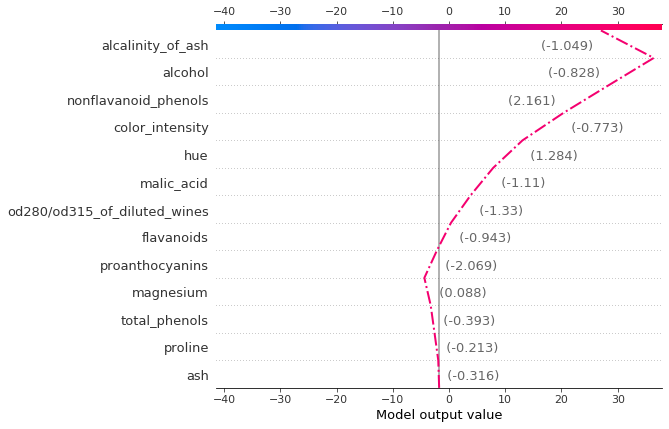

In [15]:
X = wine_norm.loc[60, :].values.reshape(1, -1)
shap_vals = logit_explainer.shap_values(X)
shap.decision_plot(
    base_value=logit_explainer.expected_value,
    shap_values=shap_vals,
    features=X,
    feature_names=wine_norm.columns.tolist(),
#     link='logit',
    highlight=0,
)

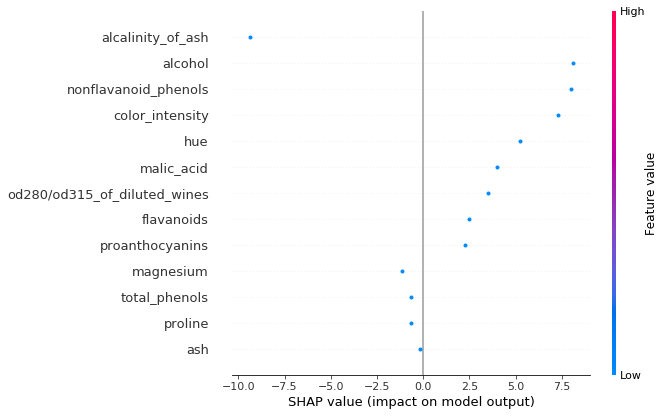

In [16]:
shap.summary_plot(
    shap_values=shap_vals,
    features=X,
    feature_names=wine_norm.columns,
)

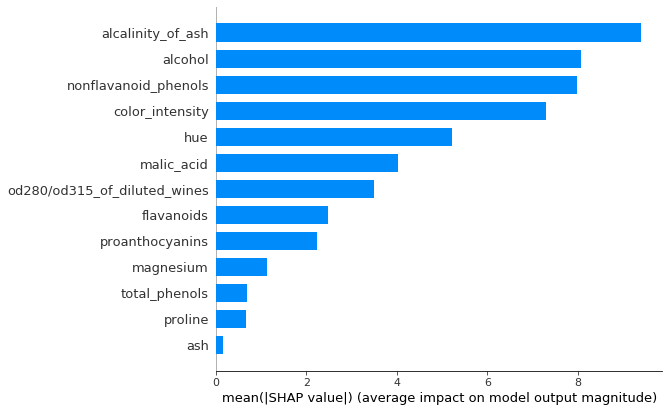

In [17]:
shap.summary_plot(
    shap_values=shap_vals,
    features=X,
    feature_names=wine_norm.columns,
    plot_type='bar',
)

In [18]:
wine_shap = logit_explainer.shap_values(wine_norm)

shap.force_plot(
    base_value=logit_explainer.expected_value,
    shap_values=wine_shap,
    features=wine_norm,
    feature_names=wine_norm.columns,
    link='logit',
)

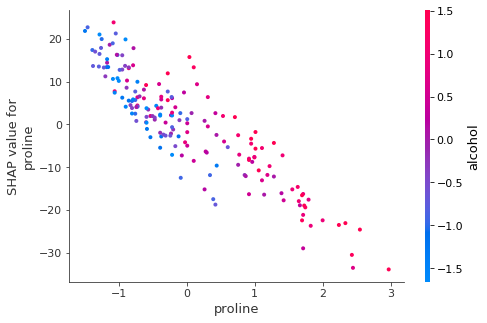

In [19]:
shap.dependence_plot(
    ind='proline',
    shap_values=wine_shap,
    features=wine_norm,
    feature_names=wine.columns,
)

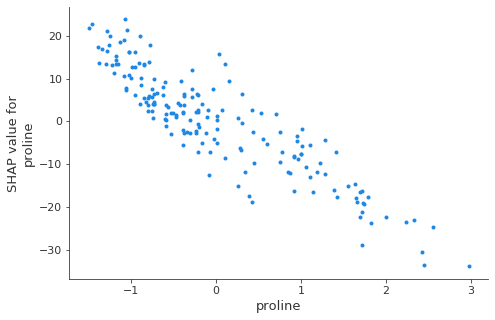

In [20]:
shap.dependence_plot(
    ind='proline',
    shap_values=wine_shap,
    features=wine_norm,
    feature_names=wine.columns,
    interaction_index=None,
)

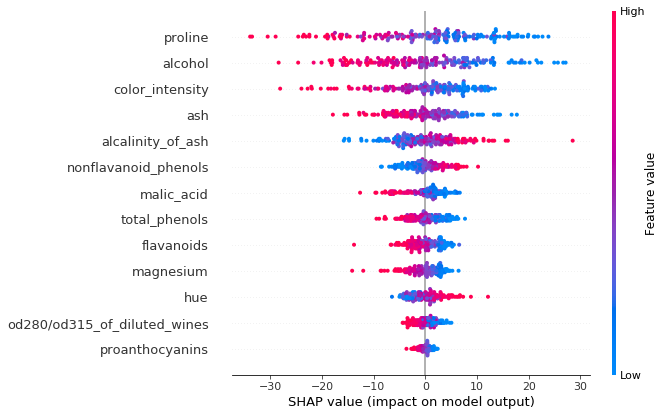

In [21]:
shap.summary_plot(wine_shap, wine_norm)

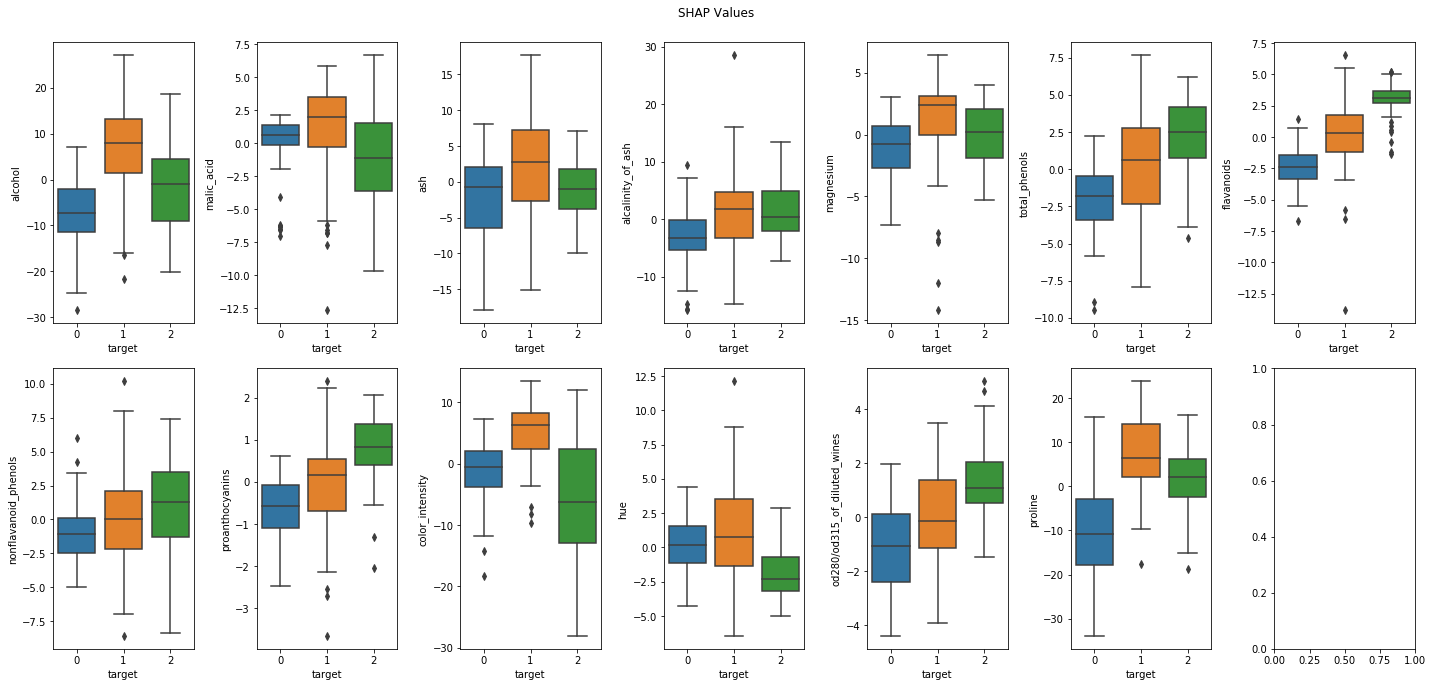

In [22]:
df = pd.DataFrame(wine_shap, columns=wine_norm.columns)
df['target'] = wine['target']

fig, axes = plt.subplots(2, 7, figsize=(20, 10))
axes = np.ravel(axes)
for i, col in enumerate(wine_norm.columns):
    sns.boxplot(data=df, x='target', y=col, ax=axes[i])
    
fig.suptitle('SHAP Values')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Another Example (Trees)

- http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
- http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

### Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [27]:
bikes = pd.read_csv('data/bike-share/day.csv', index_col='dteday', parse_dates=['dteday'])
bikes.drop(columns=['instant'], inplace=True)
print(bikes.info())
bikes.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2011-01-01 to 2012-12-31
Data columns (total 14 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10)
memory usage: 85.7 KB
None


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


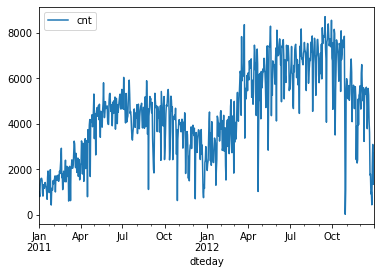

In [28]:
bikes.plot(y='cnt')

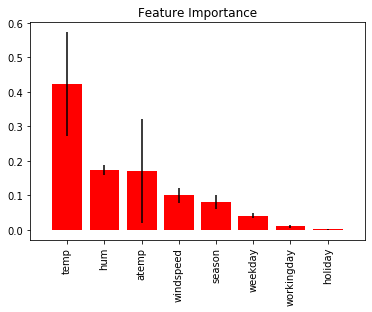

In [43]:
from sklearn.ensemble import RandomForestRegressor
import scikitplot

feature_cols = ['season', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']
x = bikes[feature_cols]
y = bikes['cnt']

rf = RandomForestRegressor()
rf.fit(x, y)

scikitplot.estimators.plot_feature_importances(rf, feature_names=feature_cols, x_tick_rotation=90)

In [101]:
from shap import TreeExplainer

tree_exp = TreeExplainer(rf, data=x)
bike_shap = tree_exp.shap_values(x, y)
bike_shap.shape

(731, 8)

In [104]:
tree_exp.expected_value

4518.323117487734

In [102]:
print(y.iloc[0])
shap.force_plot(tree_exp.expected_value, bike_shap[0,:], x.iloc[0,:])

985


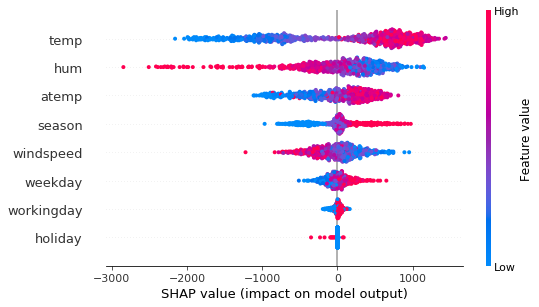

In [103]:
shap.summary_plot(bike_shap, x)

Text(0, 0.5, 'Change in ridership')

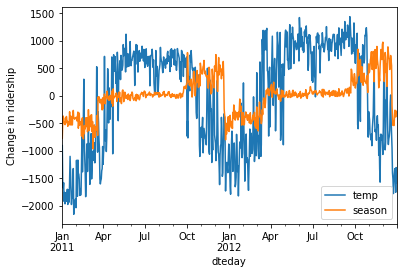

In [71]:
df = pd.DataFrame(bike_shap, columns=feature_cols)
df.index = y.index
df.plot(y=['temp', 'season'])
plt.ylabel('Change in ridership')

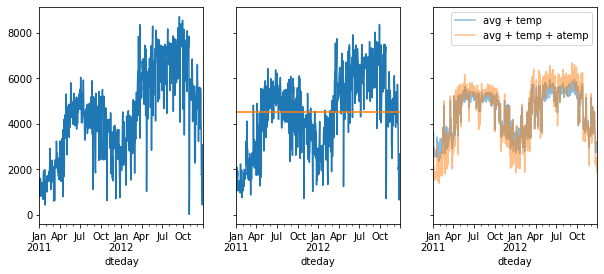

In [93]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 4))

y.plot(label='ridership', ax=axes[0])

pred = pd.Series(rf.predict(x), index=y.index)
pred.plot(label='prediction', ax=axes[1])

s = pd.Series(data=tree_exp.expected_value, index=y.index)
s.plot(label='avg', ax=axes[1])

df = pd.DataFrame(bike_shap, columns=feature_cols)
df.index = y.index
(df['temp'] + s).plot(label='avg + temp', alpha=0.5, ax=axes[2])

(df['temp'] + df['atemp'] + s).plot(label='avg + temp + atemp', alpha=0.5, ax=axes[2])

plt.ylabel('Change in ridership')
plt.legend()

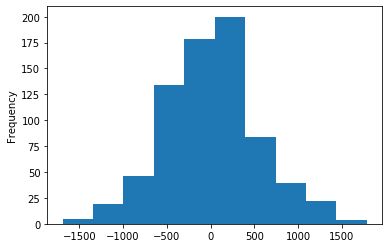

In [99]:
(bike_shap.sum(axis=1) - y + tree_exp.expected_value).plot.hist()

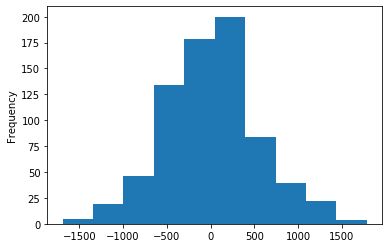

In [100]:
(rf.predict(x) - y).plot.hist()

In [65]:
shap.force_plot(
    base_value=tree_exp.expected_value,
    shap_values=bike_shap,
    features=x,
    feature_names=x.columns,
)